In [33]:
#Hi! Thanks so much for helping us out with this!

#my main question is: I'm not 100% sure of the arguments passed in the last two cells
#should I do something differently? I'm not sure if this gives the best results

#I used this site as a source: https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/3bee909a-5b69-4a50-9cd3-fdcd98fa5bd1/view?access_token=178b412e00a89ec0bca53f6fa65e9be58e392b23f684cb7377418ead7b8af4c2
#The code from above link was used in this story: https://pudding.cool/2018/11/dearabby/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re, os, time, json, csv

import nltk as nlp
from nltk.stem import WordNetLemmatizer

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

from gensim.models import word2vec

In [2]:
#load master speeches dataframe
df=pd.read_excel(r'C:\Users\Vivek Rao\Desktop\IDS\Digital\McRobbie NLP\speeches\master_speeches.xlsx')

In [3]:
#find missing values in the contents column
df[df.contents.isna()==True]

,date,venue,title,contents


In [4]:
#write function to clean sentences
#will be used as tokenizer in next cell
df_cleaned = df.copy()

wordnet_lemmatizer = WordNetLemmatizer()

#write function
def clean_text(text):
    #lowercase text first
    text=text.lower()
    text=text.replace('\n', ' ')
    text=text.replace('\t', ' ')
    tokens = nltk.word_tokenize(text)
    text=[word for word in tokens if not word in set(nlp.corpus.stopwords.words('english'))]
    stems = []
    for item in text:
        stems.append(wordnet_lemmatizer.lemmatize(item))
    return stems

In [7]:
t0=time.time()

#first step: set up the model by loading in the sentence cleaner.
#the following step does not run the model
tfidf = TfidfVectorizer(stop_words='english', tokenizer=clean_text, min_df=0.025, max_df=.5)

#next, run the model on speeches, i.e. the 'Contents' column of the DataFrame
tfs = tfidf.fit_transform(df.contents)
print('Time elapsed: {} seconds'.format(time.time()-t0))

C:\Users\Vivek Rao\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le', 'u'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Time elapsed: 1027.7006571292877 seconds


In [14]:
#reduce number of dimensions of text to make analysis easier
#n_components is 3 because we want the visualization to be three-dimensional
tfs_reduced = TruncatedSVD(n_components=2).fit_transform(tfs)
print(tfs_reduced, len(tfs_reduced))

#convert speech titles to a list to append to each x-y-z coordinate,
#so users know what speech they're hovering over
#to see a demo of the visualization, check out tsne3d.html
speech_title = df.title.to_list()
speech = df.contents.to_list()
dict={}
for speech_title, speech in zip(speech_title, speech):
    dict[speech_title]=speech
    
#print for my sanity
list(dict.keys())

[[ 0.27870188  0.13561265]
 [ 0.49859581 -0.28868892]
 [ 0.22744671 -0.14617388]
 ...
 [ 0.20220505  0.10243758]
 [ 0.24201907  0.05842697]
 [ 0.33800855 -0.07205232]] 501


['Dedication of the Elinor Ostrom Statue and Ostrom Commons',
 'Economic Club of Indiana ',
 'Report to the Trustees of Indiana University\n',
 'Recommendations to the Board of Trustees on the removal of David Starr Jordan’s name from campus structures and spaces\n',
 'Introduction to Bicentennial Strategic Plan Final Reports',
 'Presentation of President’s Medal to Jon Vickers',
 'NASEM Voting Webinar: Will our votes be secure and counted in 2020?\n',
 'Board of Trustees Business Meeting Retirement Remarks',
 'Statement to Board of Trustees on FY2020 External Grant Funding and Private Philanthropy\n',
 'Remarks to the Board of Trustees Academic Affairs Committee',
 'APAN50 Virtual Meeting and Conference – Hong Kong Keynote Address',
 'Surprise Farewell Reception for William J. Lowe, Chancellor of IU Northwest',
 'Board of Trustees President’s Report',
 "Statement to the IU Board of Trustees on IU's Response to the COVID-19 Global Pandemic\n",
 'Presentation of Richard G. Lugar Award t

In [32]:
#run above dictionary through the TSNE model
#n_components is 3 because we want this to be three-dimensional
#function documentation can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
model = TSNE(n_components=2, perplexity=23, n_iter=25000, verbose=3).fit_transform(tfs_reduced) #, method='exact').fit_transform(tfs_reduced)

# save to json
x_axis=model[:,0]
y_axis=model[:,1]
# z_axis=model[:,2]

x_norm = (x_axis-np.min(x_axis)) / (np.max(x_axis) - np.min(x_axis))
y_norm = (y_axis-np.min(y_axis)) / (np.max(y_axis) - np.min(y_axis))
# z_norm = (z_axis-np.min(z_axis)) / (np.max(z_axis) - np.min(z_axis))

data = {"x":x_norm.tolist(), "y":y_norm.tolist(), "names":list(dict.keys())}

with open(r'C:\Users\Vivek Rao\Desktop\IDS\Digital\McRobbie NLP\models\perp23_ncomp2_verb3.json', 'w') as outfile:
    json.dump(data, outfile)

[t-SNE] Computing 70 nearest neighbors...
[t-SNE] Indexed 501 samples in 0.001s...
[t-SNE] Computed neighbors for 501 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 501 / 501
[t-SNE] Mean sigma: 0.022359
[t-SNE] Computed conditional probabilities in 0.021s
[t-SNE] Iteration 50: error = 59.6349945, gradient norm = 0.5257760 (50 iterations in 0.140s)
[t-SNE] Iteration 100: error = 60.3977928, gradient norm = 0.4967720 (50 iterations in 0.147s)
[t-SNE] Iteration 150: error = 59.1676216, gradient norm = 0.4961248 (50 iterations in 0.171s)
[t-SNE] Iteration 200: error = 59.4349670, gradient norm = 0.5022141 (50 iterations in 0.220s)
[t-SNE] Iteration 250: error = 58.9213257, gradient norm = 0.5147982 (50 iterations in 0.187s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.921326
[t-SNE] Iteration 300: error = 0.4658591, gradient norm = 0.0009254 (50 iterations in 0.183s)
[t-SNE] Iteration 350: error = 0.4131903, gradient norm = 0.0012081 (

[t-SNE] Iteration 4250: error = 0.3790710, gradient norm = 0.0000971 (50 iterations in 0.144s)
[t-SNE] Iteration 4300: error = 0.3790406, gradient norm = 0.0001038 (50 iterations in 0.141s)
[t-SNE] Iteration 4300: did not make any progress during the last 300 episodes. Finished.
[t-SNE] KL divergence after 4300 iterations: 0.379041


In [40]:
# Some helper functions for plotting annotated t-SNE visualizations

# TODO: adjust_text not available in kernels
try:
    from adjustText import adjust_text
except ImportError:
    def adjust_text(*args, **kwargs):
        pass

def adjust_text(*args, **kwargs):
    pass

def plot_bg(bg_alpha=.01, figsize=(13, 9), emb_2d=None):
    """Create and return a plot of all our movie embeddings with very low opacity.
    (Intended to be used as a basis for further - more prominent - plotting of a 
    subset of movies. Having the overall shape of the map space in the background is
    useful for context.)
    """
    if emb_2d is None:
        emb_2d = model
    fig, ax = plt.subplots(figsize=figsize)
    X = emb_2d[:, 0]
    Y = emb_2d[:, 1]
    ax.scatter(X, Y, alpha=bg_alpha)
    return ax

def annotate_sample(n, n_ratings_thresh=0):
    """Plot our embeddings with a random sample of n movies annotated.
    Only selects movies where the number of ratings is at least n_ratings_thresh.
    """
    sample = mainstream_movies[mainstream_movies.n_ratings >= n_ratings_thresh].sample(
        n, random_state=1)
    plot_with_annotations(sample.index)

def plot_by_title_pattern(pattern, **kwargs):
    """Plot all movies whose titles match the given regex pattern.
    """
    match = df[df.title.str.contains(pattern)]
    return plot_with_annotations(match.index, **kwargs)

def add_annotations(ax, label_indices, emb_2d=None, **kwargs):
    if emb_2d is None:
        emb_2d = embs
    X = emb_2d[label_indices, 0]
    Y = emb_2d[label_indices, 1]
    ax.scatter(X, Y, **kwargs)

def plot_with_annotations(label_indices, text=True, labels=None, alpha=1, **kwargs):
    ax = plot_bg(**kwargs)
    Xlabeled = model[label_indices, 0]
    Ylabeled = model[label_indices, 1]
    if labels is not None:
        for x, y, label in zip(Xlabeled, Ylabeled, labels):
            ax.scatter(x, y, alpha=alpha, label=label, marker='1',
                       s=90,
                      )
        fig.legend()
    else:
        ax.scatter(Xlabeled, Ylabeled, alpha=alpha, color='green')
    
    if text:
        # TODO: Add abbreviated title column
        titles = mainstream_movies.loc[label_indices, 'speech_title'].values
        texts = []
        for label, x, y in zip(titles, Xlabeled, Ylabeled):
            t = ax.annotate(label, xy=(x, y))
            texts.append(t)
        adjust_text(texts, 
                    #expand_text=(1.01, 1.05),
                    arrowprops=dict(arrowstyle='->', color='red'),
                   )
    return ax

FS = (13, 9)
def plot_region(x0, x1, y0, y1, text=True):
    """Plot the region of the mapping space bounded by the given x and y limits.
    """
    fig, ax = plt.subplots(figsize=FS)
    pts = df[
        (df.x >= x0) & (df.x <= x1)
        & (df.y >= y0) & (df.y <= y1)
    ]
    ax.scatter(pts.x, pts.y, alpha=.6)
    ax.set_xlim(x0, x1)
    ax.set_ylim(y0, y1)
    if text:
        texts = []
        for label, x, y in zip(pts.title.values, pts.x.values, pts.y.values):
            t = ax.annotate(label, xy=(x, y))
            texts.append(t)
        adjust_text(texts, expand_text=(1.01, 1.05))
    return ax

def plot_region_around(title, margin=5, **kwargs):
    """Plot the region of the mapping space in the neighbourhood of the the movie with
    the given title. The margin parameter controls the size of the neighbourhood around
    the movie.
    """
    xmargin = ymargin = margin
    match = df[df.title == title]
    assert len(match) == 1
    row = match.iloc[0]
    return plot_region(row.x-xmargin, row.x+xmargin, row.y-ymargin, row.y+ymargin, **kwargs)

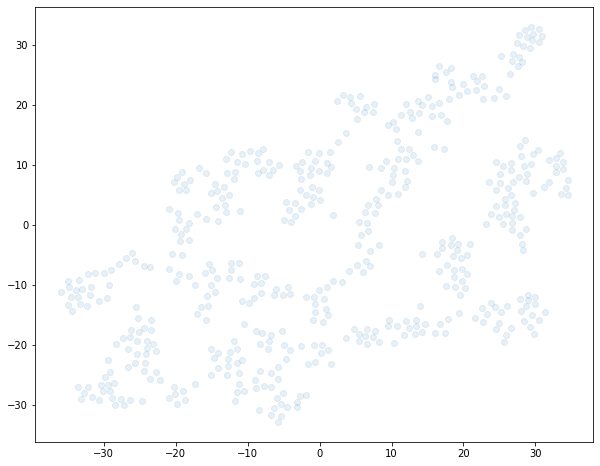

In [38]:
FS = (10, 8)
fig, ax = plt.subplots(figsize=FS)
# Make points translucent so we can visually identify regions with a high density of overlapping points
ax.scatter(x_axis, y_axis, alpha=.1)

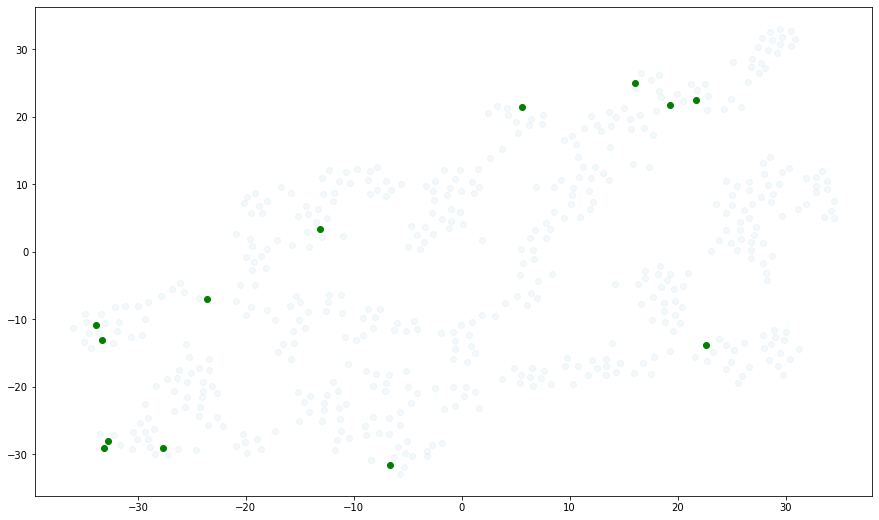

In [56]:
# This and several other helper functions are defined in a code cell above. Hit the "code"
# button above if you're curious about how they're implemented.
plot_by_title_pattern('Bloomington', figsize=(15, 9), bg_alpha=.05, text=False);